In [36]:
# Лабораторная работа 3_2_1
# Применение логистической регрессии для классификации на датасете Titanic

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
# Задание 1. Предобработка данных

# Загрузка данных
titanic = pd.read_csv('Titanic.csv')

# Удаление строк с пропусками
initial_rows = len(titanic)
titanic = titanic.dropna()
rows_after_dropna = len(titanic)
print(f"Удалено строк с пропусками: {initial_rows - rows_after_dropna}")

# Удаление нечисловых столбцов (кроме Sex и Embarked)
cols_to_drop = ['Name', 'Ticket', 'Cabin']
titanic = titanic.drop(cols_to_drop, axis=1)

# Перекодировка категориальных признаков
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Удаление PassengerId
titanic = titanic.drop('PassengerId', axis=1)

# Расчет процента потерянных данных
initial_size = initial_rows * len(titanic.columns)
final_size = rows_after_dropna * len(titanic.columns)
data_loss = (initial_size - final_size) / initial_size * 100
print(f"Процент потерянных данных: {data_loss:.2f}%")

# Вывод обработанных данных
print("\nОбработанные данные:")
display(titanic.head())



Удалено строк с пропусками: 708
Процент потерянных данных: 79.46%

Обработанные данные:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,3
6,0,1,0,54.0,0,0,51.8625,3
10,1,3,1,4.0,1,1,16.7000,3
11,1,1,1,58.0,0,0,26.5500,3


In [38]:
# Задание 2. Машинное обучение

# Разделение данных
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Оценка точности
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

# Вывод коэффициентов
print("\nКоэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")



Точность модели: 0.6909

Коэффициенты модели:
Pclass: -0.5906
Sex: 2.4562
Age: -0.0250
SibSp: -0.2223
Parch: -0.3978
Fare: 0.0029
Embarked: -0.1935


Точность без признака Embarked: 0.6909
Разница в точности: 0.0000


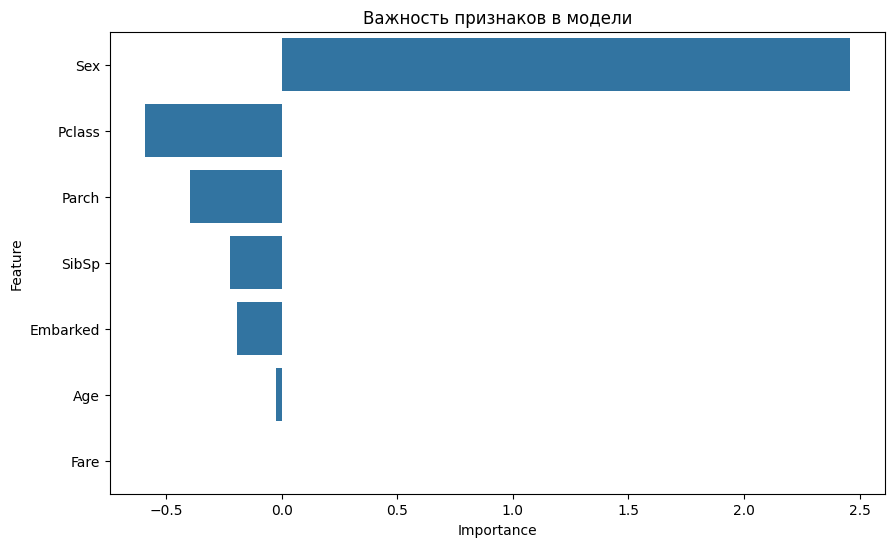

In [39]:
# Влияние признака Embarked на точность модели

# Модель без Embarked
X_no_emb = X.drop('Embarked', axis=1)
X_train_no_emb, X_test_no_emb, y_train_no_emb, y_test_no_emb = train_test_split(
    X_no_emb, y, test_size=0.3, random_state=42)

model_no_emb = LogisticRegression(max_iter=1000, random_state=42)
model_no_emb.fit(X_train_no_emb, y_train_no_emb)
y_pred_no_emb = model_no_emb.predict(X_test_no_emb)
accuracy_no_emb = accuracy_score(y_test_no_emb, y_pred_no_emb)

print(f"Точность без признака Embarked: {accuracy_no_emb:.4f}")
print(f"Разница в точности: {accuracy - accuracy_no_emb:.4f}")

# Визуализация важности признаков
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values('Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков в модели')
plt.show()